In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tqdm

# 1. GETTING FAMILIAR WITH THE IBTRACS DATABASE

## 1.1

In [71]:
datas = pd.read_csv('INPUTS/ibtracs.ALL.list.hotel1.csv',low_memory=False,header=1)

In [4]:
datas

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680887,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 12:00:00,NR,-14.0000,165.0000,...,,,,,,,,,2,100
680888,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 15:00:00,NR,-14.3051,165.1850,...,,,,,,,,,8,151
680889,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 18:00:00,NR,-14.7000,165.4000,...,,,,,,,,,6,149
680890,2019043S14165,2019,9,SP,MM,OMA,2019-02-13 21:00:00,NR,-14.8024,165.4930,...,,,,,,,,,1,90


## 1.2

In [5]:
print("Il y'a "+str(np.shape(datas)[0])+" lignes et "+str(np.shape(datas)[1])+" colonnes.")

Il y'a 680892 lignes et 163 colonnes.


## 1.3

In [6]:
datas.describe

<bound method NDFrame.describe of                   SID  SEASON  NUMBER BASIN SUBBASIN       NAME  \
0       1842298N11080    1842       1    NI       BB  NOT_NAMED   
1       1842298N11080    1842       1    NI       BB  NOT_NAMED   
2       1842298N11080    1842       1    NI       BB  NOT_NAMED   
3       1842298N11080    1842       1    NI       BB  NOT_NAMED   
4       1842298N11080    1842       1    NI       BB  NOT_NAMED   
...               ...     ...     ...   ...      ...        ...   
680887  2019043S14165    2019       9    SP       MM        OMA   
680888  2019043S14165    2019       9    SP       MM        OMA   
680889  2019043S14165    2019       9    SP       MM        OMA   
680890  2019043S14165    2019       9    SP       MM        OMA   
680891  2019043S14165    2019       9    SP       MM        OMA   

                   ISO_TIME NATURE      LAT       LON  ... BOM_GUST_PER  \
0       1842-10-25 03:00:00     NR  10.9000   80.3000  ...                
1       184

## 1.4

In [7]:
print("Le plus ancien cyclone a été relevé en: "+str(min(datas["SEASON"])))

Le plus ancien cyclone a été relevé en: 1842


## 1.5

In [8]:
datas["NATURE"].value_counts()

TS    479658
NR    158743
ET     26497
DS      6787
MX      6671
SS      2536
Name: NATURE, dtype: int64

Les systèmes tropicales ("TS") sont les plus prédominants.

# 2. ANALYSIS OF TROPICAL SYSTEMS PER BASIN

## 2.1

In [9]:
SID_and_year = datas[["SID","SEASON"]]
moyenne = np.mean(SID_and_year.drop_duplicates(subset="SID",keep="first").value_counts("SEASON"))
print("En moyenne, par année le nombre de cyclone est de: "+str(moyenne))

En moyenne, par année le nombre de cyclone est de: 77.97674418604652


## 2.2

In [10]:
SID_year_basin = datas[["SID","SEASON","BASIN"]]
df = SID_year_basin.fillna(value='NA', inplace=False) #Interprète la valeur NA pour north atlantic comme un nan sinon.
nom_bassin = df['BASIN'].unique()
annee = df['SEASON'].unique()
for x in nom_bassin:
    if type(x) != float: #On évite le bassin ou le nom est un NaN
        tri_par_bassin = df[df['BASIN'] == x]
        moyenne_bassin = sum(tri_par_bassin.drop_duplicates(subset="SID",keep='first').value_counts("SEASON"))/(len(annee))
        print("Pour le bassin "+x+" ,la moyenne est de "+str(moyenne_bassin)+" par année.")
        print('--------------------------------')
        

Pour le bassin NI ,la moyenne est de 10.05813953488372 par année.
--------------------------------
Pour le bassin SI ,la moyenne est de 17.46511627906977 par année.
--------------------------------
Pour le bassin NA ,la moyenne est de 12.924418604651162 par année.
--------------------------------
Pour le bassin EP ,la moyenne est de 9.0 par année.
--------------------------------
Pour le bassin WP ,la moyenne est de 24.575581395348838 par année.
--------------------------------
Pour le bassin SP ,la moyenne est de 7.563953488372093 par année.
--------------------------------
Pour le bassin SA ,la moyenne est de 0.011627906976744186 par année.
--------------------------------


## 2.3

In [11]:
df = datas[["SID","SEASON","BASIN","NATURE"]]
tab = df[df['NATURE']=="TS"].fillna(value='NA', inplace=False)#Interprète la valeur NA pour north atlantic comme un nan sinon.
nom_bassin = tab['BASIN'].unique()
annees = []
nombres_TS = []
for x in nom_bassin:
    tri_par_bassin = tab[tab['BASIN'] == x]
    annee = tri_par_bassin['SEASON'].unique()
    nombre_par_annee = tri_par_bassin.drop_duplicates(subset="SID",keep='first').value_counts("SEASON")
    years = []
    nombres_TS_bassin = []
    for y in annee:
        years.append(y)
        nombres_TS_bassin.append(nombre_par_annee[y])
    annees.append(years)
    nombres_TS.append(nombres_TS_bassin)   

In [12]:
def interpo_zero(annees_ref,annees,liste):
    output = []
    for i in range(len(annees_ref)):
        if annees_ref[i] in annees:
            ind = annees.index(annees_ref[i])
            output.append(liste[ind])
        else:
            output.append(0)
    return output

TS = [nombres_TS[0]]
for i in range(1,len(annees)):
    TS.append(interpo_zero(annees[0],annees[i],nombres_TS[i]))

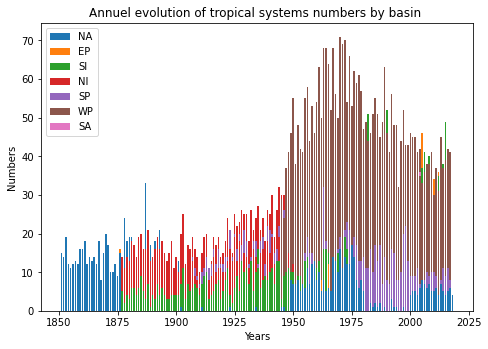

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(annees[0],TS[0],width=0.65,label=nom_bassin[0])
for i in range(1,7):
    ax.bar(annees[0],TS[i],width=0.65,label=nom_bassin[i],bottom=TS[i-1])
ax.set_title("Annuel evolution of tropical systems numbers by basin ")
ax.set_xlabel("Years")
ax.set_ylabel("Numbers")
ax.legend()
plt.savefig("OUTPUTS/Annuel_evolution_oft_tropical_systems_numbers_by_basin.jpeg",dpi=1000,bbox_inches="tight")

## 2.4

A répondre

# 3. TROPICALS SYSTEMS IN MEXICO

In [13]:
df_temp = datas[datas['SEASON']>1979] #On regarde uniquement les cyclones formés après 1980:
df = df_temp[df_temp['NATURE']=='TS'].fillna(value='NA', inplace=False)#Interprète la valeur NA pour north atlantic comme un nan sinon.

## 3.1

Les bassins qui concerneront Mexico seront EP (Eastern Pacific) et NA (North Atlantic).

## 3.2

In [14]:
#On selectionne les bassins EP et NA pour la zone concernée:
df_zone_large = df[df['BASIN'].isin(['EP','NA'])]

## 3.3

In [15]:
#On définit un rectangle où Mexico se trouve
"""corner_top_left = [-100.3738,20.2745]
corner_bottom_left = [-100.3738,18.3044]
corner_bottom_right = [ -97.5393,18.3044]
corner_top_right = [-97.5393,20.2745]"""

df_mexico_1 = df_zone_large[df_zone_large['LAT']>18.3044]
df_mexico_2 = df_mexico_1[df_mexico_1['LAT']<20.2745]
df_mexico_3 = df_mexico_2[df_mexico_2['LON']>-100.3738]
df_mexico = df_mexico_3[df_mexico_3['LON']<-97.5393].drop_duplicates(subset='SID',keep='first')

In [16]:
df_mexico.value_counts('BASIN')

BASIN
NA    4
EP    1
dtype: int64

On remarque que pour le rectangle selectionné (un peu plus grand que l'air de Mexico), on a 4 TS venants du bassin North Atlantic et 1 venant du bassin Eastern Pacific. Comme on pouvait s'y attendre, Mexico se situe sur une latitude où les alizés sont dominants (flux d'est). Ainsi les cyclones se formant a l'ouest on plus de chance de venir impacter la ville dans le flux d'est. 

## 3.4

In [17]:
df_mexico.value_counts('USA_PRES')

USA_PRES
1000    2
1002    1
1005    1
998     1
dtype: int64

On remarque qu'on a eu un minimum de pression de 998 hPa dans la zone de Mexico. Cependant, parmis les cyclones qui ont touchés la zone définie, on va chercher a remonter les trajectoires et à savoir le minimum en pression des 5 cyclones qui ont touchés cette zone pendant leurs durées de vie.

In [18]:
ID_TS_mexico = df_mexico['SID'].unique()
min_pression = []
for x in ID_TS_mexico:
    TS = df_zone_large.loc[df_zone_large['SID'] == x]
    float_pression = []
    for y in TS['USA_PRES'].unique():
        if y!=' ':
            float_pression.append(float(y))
    min_pression.append([np.min(float_pression),x])

In [19]:
min_pression

[[987.0, '1988245N20269'],
 [979.0, '1989169N13265'],
 [998.0, '2005235N19266'],
 [981.0, '2017219N16279'],
 [972.0, '2017249N22263']]

In [20]:
df_mexico.loc[df_mexico['SID'] == '2017249N22263']

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
674252,2017249N22263,2017,72,NA,NA,KATIA,2017-09-09 09:00:00,TS,20.1412,-97.5955,...,,,,12,75,,,,3,235


Le cyclone de 2017 qui a touché la zone de Mexico à 1002 hPa nommé Katia a eu un minimum le plus bas dans sa durée de vie de 972 hPa. 

In [21]:
df_mexico.value_counts('USA_WIND')

USA_WIND
25    2
32    2
40    1
dtype: int64

Dans la zone de Mexico, on remarque que le maximum de vent observé est de 40 kts. Cependant, parmis les cyclones qui ont touchés la zone définie, on va chercher a remonter les trajectoires et à savoir le maximum de vent des 5 cyclones qui ont touchés cette zone pendant leurs durées de vie.

In [23]:
max_vent = []
for x in ID_TS_mexico:
    TS = df_zone_large.loc[df_zone_large['SID'] == x]
    float_vent = []
    for y in TS['USA_WIND'].unique():
        if y!=' ':
            float_vent.append(float(y))
    max_vent.append([np.max(float_vent),x])

In [24]:
max_vent

[[65.0, '1988245N20269'],
 [75.0, '1989169N13265'],
 [50.0, '2005235N19266'],
 [75.0, '2017219N16279'],
 [90.0, '2017249N22263']]

In [27]:
df_mexico.loc[df_mexico['SID'] == '2017249N22263']

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOKYO_LAT,TOKYO_LON,TOKYO_GRADE,TOKYO_WIND,TOKYO_PRES,TOKYO_R50_DIR,TOKYO_R50_LONG,TOKYO_R50_SHORT,TOKYO_R30_DIR,TOKYO_R30_LONG,TOKYO_R30_SHORT,TOKYO_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,REUNION_LAT,REUNION_LON,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_TNUM,REUNION_CI,REUNION_RMW,REUNION_R34_NE,REUNION_R34_SE,REUNION_R34_SW,REUNION_R34_NW,REUNION_R50_NE,REUNION_R50_SE,REUNION_R50_SW,REUNION_R50_NW,REUNION_R64_NE,REUNION_R64_SE,REUNION_R64_SW,REUNION_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,NADI_LAT,NADI_LON,NADI_CAT,NADI_WIND,NADI_PRES,WELLINGTON_LAT,WELLINGTON_LON,WELLINGTON_WIND,WELLINGTON_PRES,DS824_LAT,DS824_LON,DS824_STAGE,DS824_WIND,DS824_PRES,TD9636_LAT,TD9636_LON,TD9636_STAGE,TD9636_WIND,TD9636_PRES,TD9635_LAT,TD9635_LON,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
674252,2017249N22263,2017,72,NA,NA,KATIA,2017-09-09 09:00:00,TS,20.1412,-97.5955,,,,main,0,0,P_____________,,AL132017,20.1412,-97.5955,,TS,32,1002,-1,,,,,,,,,,,,,1010,80,15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12,75,,,,3,235


Le cyclone de 2017 qui a touché la zone de Mexico à 32 kts, nommé Katia, a eu un maximum de vent dans sa durée de vie de 90 kts. 

## 3.5

In [28]:
df_mexico.value_counts('SEASON')

SEASON
2017    2
1988    1
1989    1
2005    1
dtype: int64

2017 a été l'année la plus touchée avec 2 cyclones.

# 4. FOOTPRINTS OF HISTORICAL HURRICANES

In [32]:
import pyreadr

## 4.1

In [62]:
datas_bis_R = pyreadr.read_r('OUTPUTS/df_select_mex.Rdata')
datas_bis = datas_bis_R["df_select_mex"]

In [74]:
update_datas = datas[datas['SID'].isin(datas_bis["SID"].tolist())]

In [77]:
update_datas.drop_duplicates(subset="SID",keep='first')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOKYO_LAT,TOKYO_LON,TOKYO_GRADE,TOKYO_WIND,TOKYO_PRES,TOKYO_R50_DIR,TOKYO_R50_LONG,TOKYO_R50_SHORT,TOKYO_R30_DIR,TOKYO_R30_LONG,TOKYO_R30_SHORT,TOKYO_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,REUNION_LAT,REUNION_LON,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_TNUM,REUNION_CI,REUNION_RMW,REUNION_R34_NE,REUNION_R34_SE,REUNION_R34_SW,REUNION_R34_NW,REUNION_R50_NE,REUNION_R50_SE,REUNION_R50_SW,REUNION_R50_NW,REUNION_R64_NE,REUNION_R64_SE,REUNION_R64_SW,REUNION_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,NADI_LAT,NADI_LON,NADI_CAT,NADI_WIND,NADI_PRES,WELLINGTON_LAT,WELLINGTON_LON,WELLINGTON_WIND,WELLINGTON_PRES,DS824_LAT,DS824_LON,DS824_STAGE,DS824_WIND,DS824_PRES,TD9636_LAT,TD9636_LON,TD9636_STAGE,TD9636_WIND,TD9636_PRES,TD9635_LAT,TD9635_LON,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
424663,1980177N13259,1980,44,EP,MM,CELIA,1980-06-25 06:00:00,TS,13.5,-101.4,25,,hurdat_epa,main,402,402,O________OO___,hurdat_epa,EP031980,13.5000,-101.400,,TD,25,,-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,13.5000,-101.400,TC,25,,13.5000,-101.400,1,25,,,,,,,,,,,,,,,,,,,,,,,,,,,11,285
425409,1980214N11330,1980,60,NaN,NaN,ALLEN,1980-07-31 12:00:00,NR,11.0,-30.0,25,,hurdat_atl,main,1417,1417,O_____________,hurdat_atl,AL041980,11.0000,-30.0000,,DB,25,,-3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,22,267
425587,1980219N15258,1980,62,EP,MM,ISIS,1980-08-05 18:00:00,TS,14.9,-102.1,25,,hurdat_epa,main,289,289,O________OO___,hurdat_epa,EP091980,14.9000,-102.100,,TD,25,,-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,14.9000,-102.100,TC,25,,14.9000,-102.100,1,25,,,,,,,,,,,,,,,,,,,,,,,,,,,5,254
431199,1981180N11257,1981,45,EP,MM,BEATRIZ,1981-06-28 18:00:00,TS,11.4,-103.4,30,,hurdat_epa,main,705,702,O_________O___,hurdat_epa,EP021981,11.4000,-103.400,,TD,30,,-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,11.4000,-103.400,1,30,,,,,,,,,,,,,,,,,,,,,,,,,,,10,283
432133,1981225N16249,1981,66,EP,MM,GREG,1981-08-13 06:00:00,TS,16.2,-111.4,30,,hurdat_epa,main,754,754,O_________O___,hurdat_epa,EP071981,16.2000,-111.400,,TD,30,,-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,16.2000,-111.400,1,30,,,,,,,,,,,,,,,,,,,,,,,,,,,4,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

On a bien filtré les datas en fonction des Rdatas de OUTPUTS. Pour verifier, si on drop les doublons, on voit qu'on a bien 202 rows dans notre dataframe ce qui correspond au nombres de ligne dans les Rdatas de OUTPUTS.

## 4.2